# 📈 💸 Time Series

## ℹ️ Readme

* ✍️ This challenge was written by [davydw](https://github.com/davydw)
* 🎯 The goal is to predict Apple Stock Price in the future using <font color="red">AR</font><font color="green">I</font><font color="blue">MA</font> model
* 🚓 It is designed only for students of `Le Wagon - Batch 1538 - Barcelona` and cannot be reproduced without davydw's authorization. Indeed, he is no longer working as a full time employee at Le Wagon. Hence, the latter cannot claim and publish this recap on their learning platform `Kitt` without his consent.


## 📚 Libraries

In [ ]:
# DATA MANIPULATION
import pandas as pd
import numpy as np
import datetime

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# STATSMODELS = TIME SERIES ANALYSIS
## DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
## STATIONARITY ANALYSIS - HOW MANY ORDERS OF DIFFERENCING
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
## ACF AND PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
## ARIMA / SARIMA
from statsmodels.tsa.arima.model import ARIMA
## STATS GRIDSEARCH
import pmdarima as pm
## PLOT PREDICTION
from statsmodels.graphics.tsaplots import plot_predict

## 👨🏻‍🏫 Box Jenkins Method

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/lectures/machine-learning/time_serie_process_overview.jpg">

## (0) VISUALIZE

### (0.1) `AAPL` (1985-2023)

📈 [Apple Stock Price since 1985](https://finance.yahoo.com/quote/AAPL/history?period1=345427200&period2=1677715200&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true) - *Source: Yahoo Finance*

<img src="https://github.com/davydw/public-pictures/blob/main/data-illustrations/yahoo_finance_tuto_aapl_stock_price.png?raw=true" height = 200 width = 600 align = "left">

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp310-cp310-macosx_14_0_arm64.whl size=272874 sha256=69f3add16d8e0381d5a7130b8c121fbc50b4ede2232ff4216aac31c1f0a694fb
  Stored in directory: /Users/davywai/Library/Caches/pip/wheels/fd/fd/5e/90b9ec95da4fd6c96237b580ce74f89d6bdea547ad151ab5f4
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.7.1 requires packaging<24, but you have packaging 24.2 which is incompatible.
mlflow 2.7.1 requires pytz<2024, but you have pytz 

In [2]:
import yfinance as yf

In [3]:
yf.download("AAPL",start="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.582199,248.826433,241.554430,248.656607,55740700
2025-01-03,243.092728,243.911819,241.624341,243.092728,40244100
2025-01-06,244.730927,247.058369,242.932900,244.041682,45045600
2025-01-07,241.944000,245.280328,241.084944,242.713144,40856000
2025-01-08,242.433441,243.442342,239.786358,241.654299,37628900
2025-01-10,236.589874,239.896236,232.744097,239.746392,61710900
2025-01-13,234.142563,234.412271,229.467710,233.273523,49630700
2025-01-14,233.023788,235.860666,232.214681,234.492175,39435300


In [4]:
# LOADING THE DATA
df = pd.read_csv("AAPL_monthly_yahoo_1985_2023.csv")
df.shape

(459, 7)

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,0.130022,0.138951,0.124442,0.129464,0.100589,6366416000
1,1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085847,4733388800
2,1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076742,4615587200


In [6]:
df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
456,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443218300
457,2023-02-01,143.970001,157.380005,141.320007,147.410004,147.185272,1307127200
458,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55387700


In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)

In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
df.set_index("Date", inplace = True)
df.sort_index(inplace=True)

In [12]:
df = df[["Close"]]

### (0.2) First glimpse

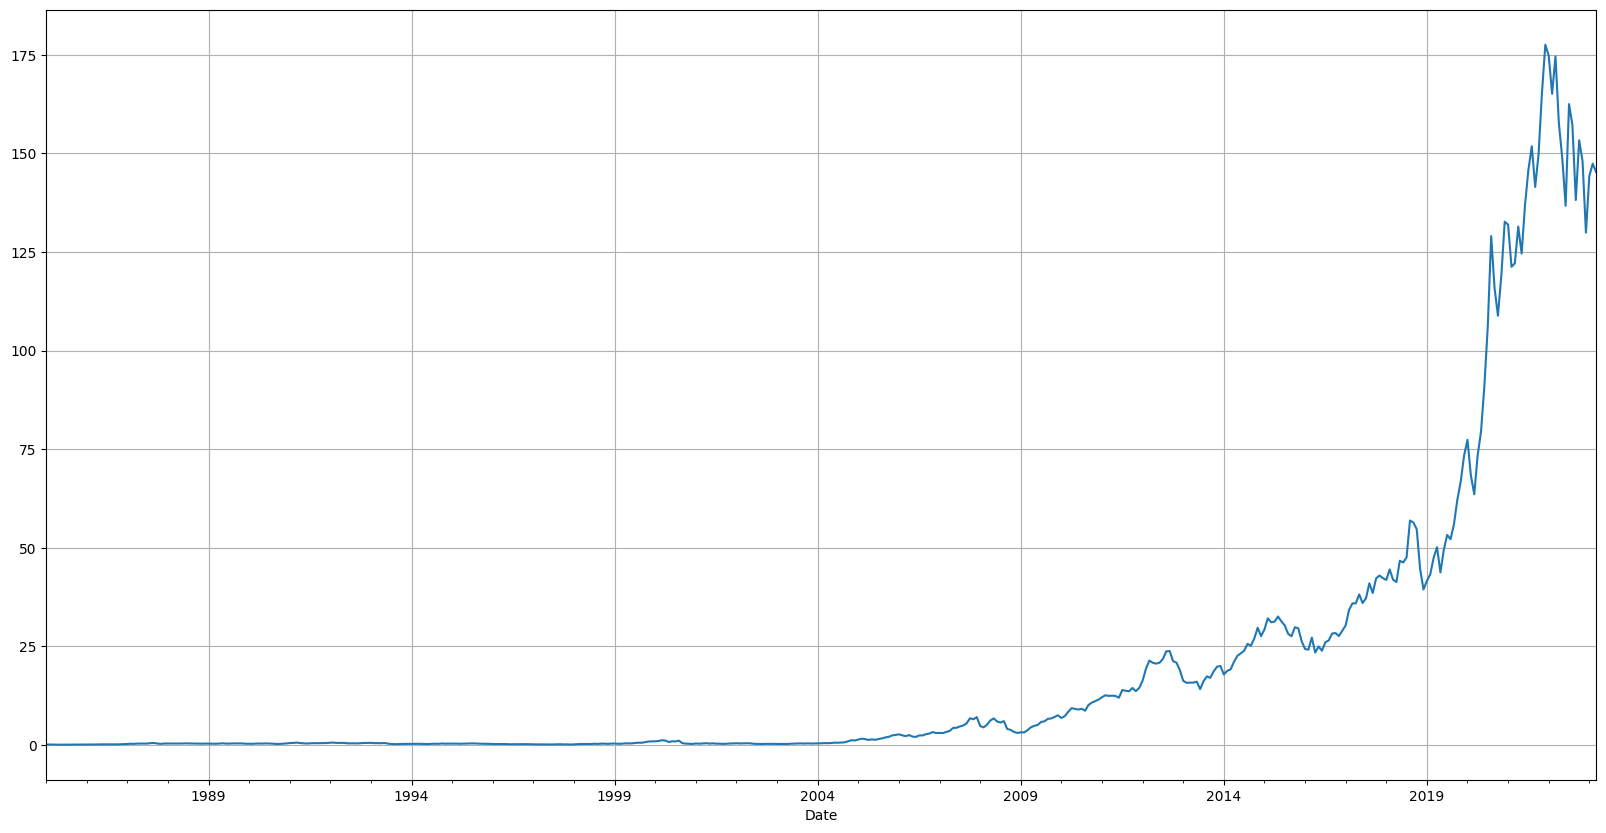

In [14]:
plt.figure(figsize=(20,10))
df["Close"].plot()
plt.grid()

### (0.3) Linearizing

In [17]:
df["LogClose"] = np.log(df["Close"])
df.tail(3)

/var/folders/sj/l5x1qb910_n10lhvkrhd4dc40000gn/T/ipykernel_96767/1846707824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LogClose"] = np.log(df["Close"])


,Close,LogClose
Date,,
2023-01-01,144.289993,4.971825
2023-02-01,147.410004,4.993218
2023-03-01,145.309998,4.978869


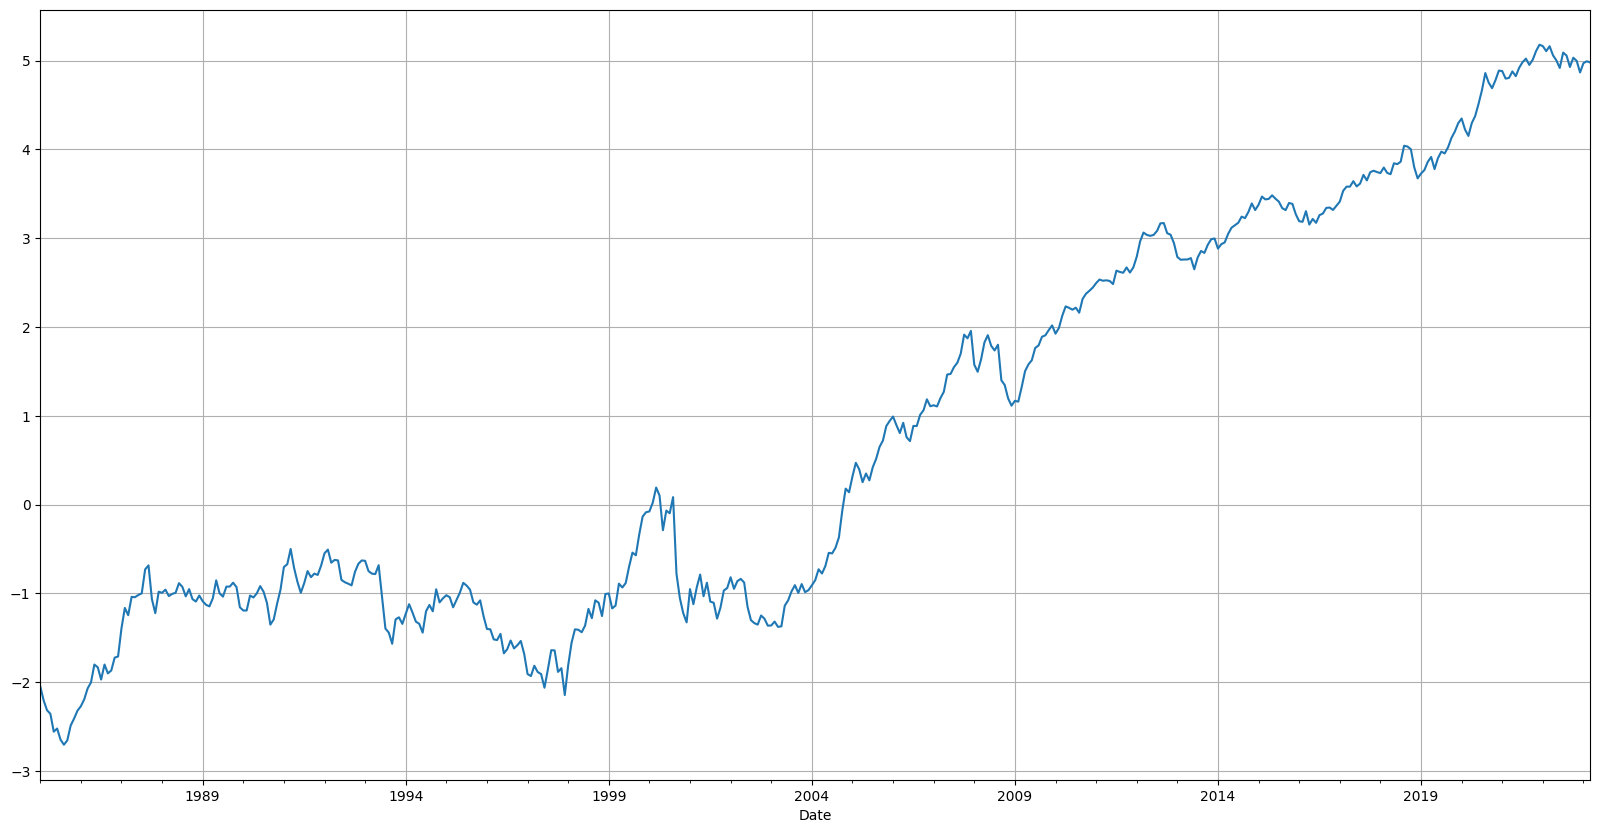

In [18]:
plt.figure(figsize=(20,10))
df["LogClose"].plot()
plt.grid()

👆 **Warnings**

* Time Series with negative values can't be decomposed multiplicatively...
* Apple stock price started skyrocketing after 2009...
* If you read a bit about Financial News, Apple proceeded to a stock split:
    - [Investopedia - Stocksplit](https://www.investopedia.com/terms/s/stocksplit.asp)
    - [Forbes 2020/07/31 - Apple announces a 4-for-1 split](https://www.forbes.com/sites/lcarrel/2020/07/31/apple-announces-4-for-1-stock-split-to-bring-in-new-investors/?sh=626f2e755401)

In [19]:
date_after = datetime.date(2020,1,1)
date_after

datetime.date(2020, 1, 1)

In [25]:
df = df.reset_index()
df

,Date,Close,LogClose
0,1985-01-01,0.129464,-2.044352
1,1985-02-01,0.110491,-2.202821
2,1985-03-01,0.098772,-2.314941
3,1985-04-01,0.094866,-2.355290
4,1985-05-01,0.077567,-2.556613
...,...,...,...
454,2022-11-01,148.029999,4.997415
455,2022-12-01,129.929993,4.866996
456,2023-01-01,144.289993,4.971825
457,2023-02-01,147.410004,4.993218


In [33]:
temporal_filter = df["Date"].dt.date > date_after

In [35]:
df = df[temporal_filter]
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

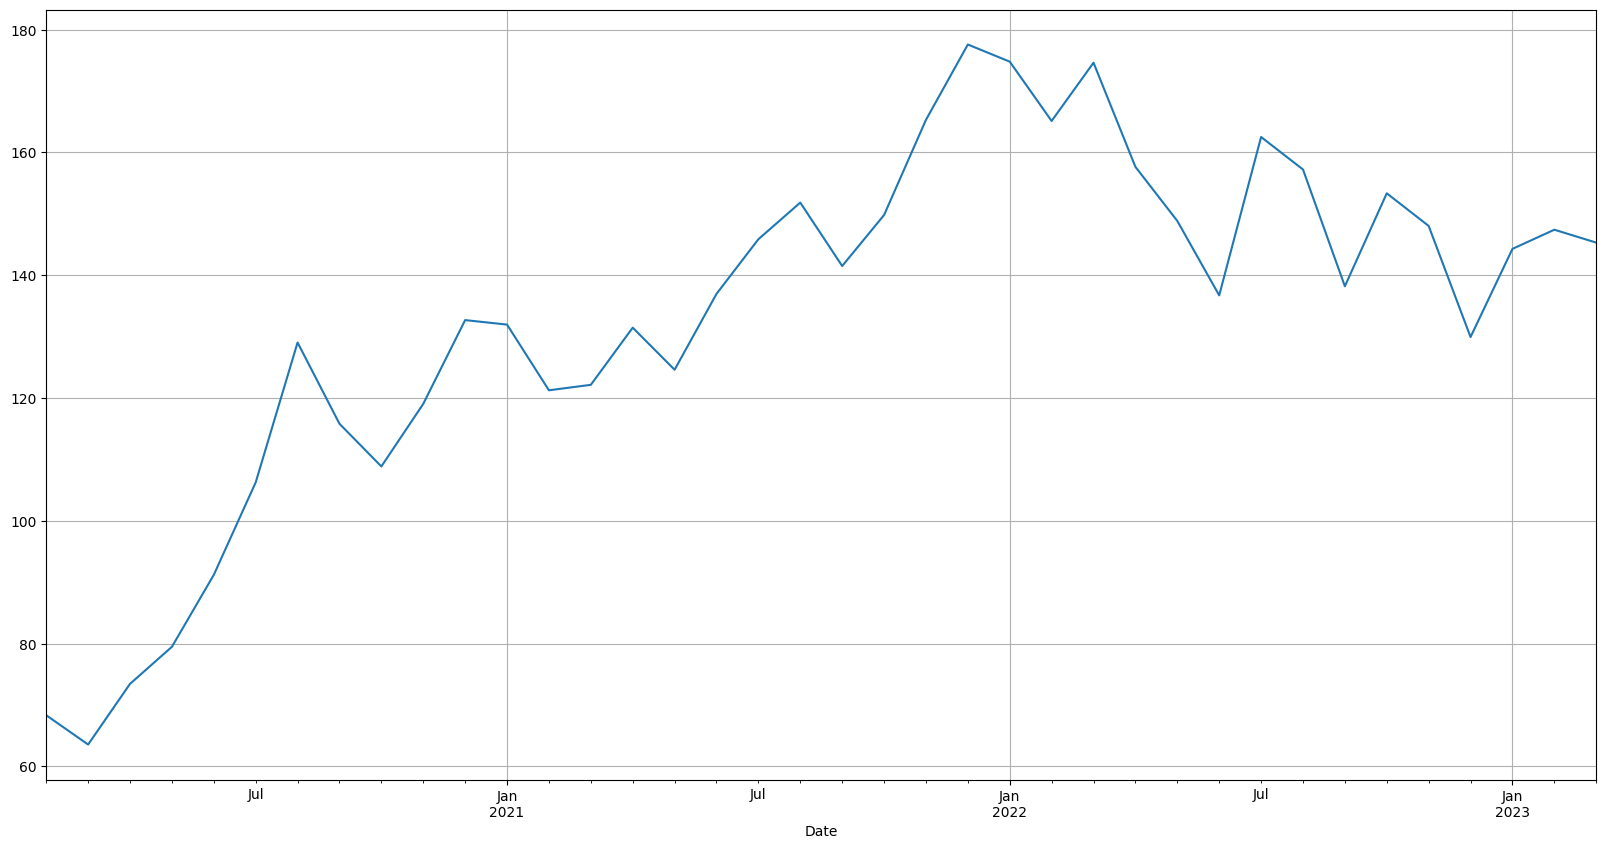

In [36]:
plt.figure(figsize=(20,10))
df["Close"].plot()
plt.grid()

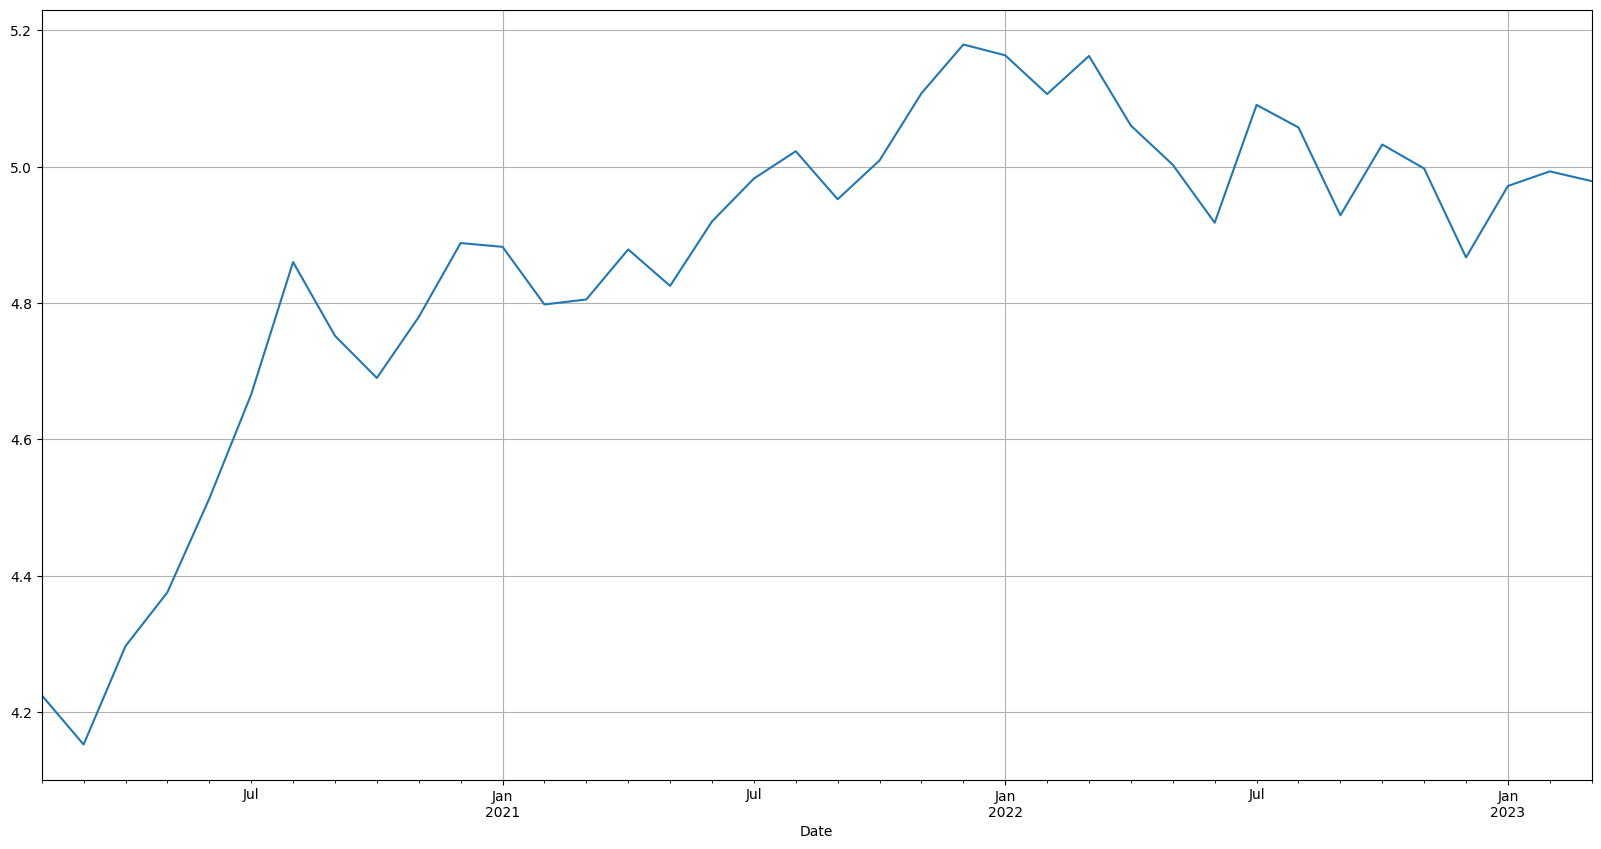

In [37]:
plt.figure(figsize=(20,10))
df["LogClose"].plot()
plt.grid()

## (1) DECOMPOSE

### (1.1) Decomposition the "original" Time Series

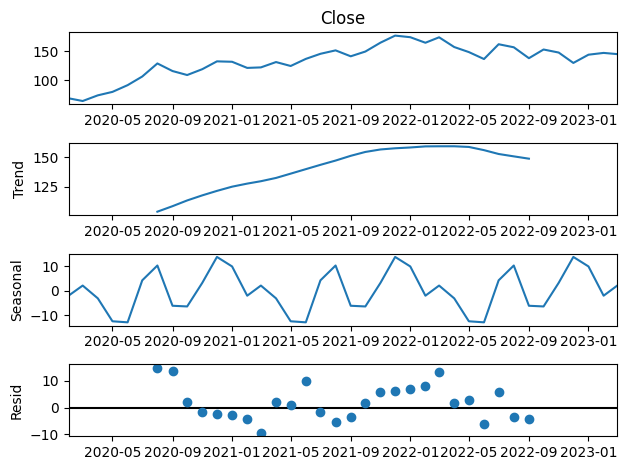

In [44]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(df["Close"], model="additive")
result_add.plot();

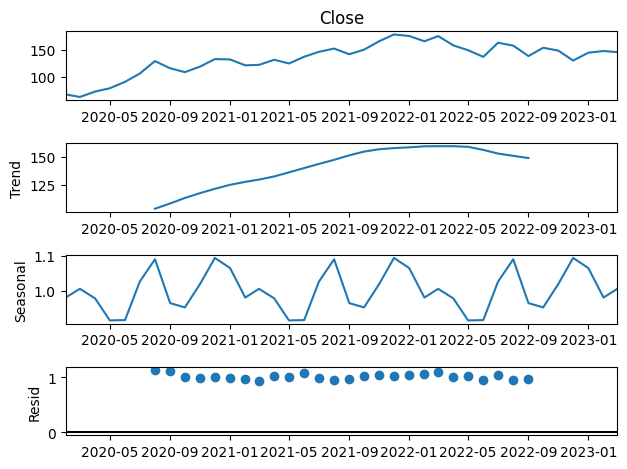

In [45]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mult = seasonal_decompose(df["Close"], model="multiplicative")
result_mult.plot();

In [46]:
# Comparing the ADF tests for both residuals

In [47]:
adfuller(result_add.resid.dropna())[1]

0.19869956585540666

In [48]:
adfuller(result_mult.resid.dropna())[1]

0.004058862113434733

### (1.2) Decomposition the "logarithmized" Time Series

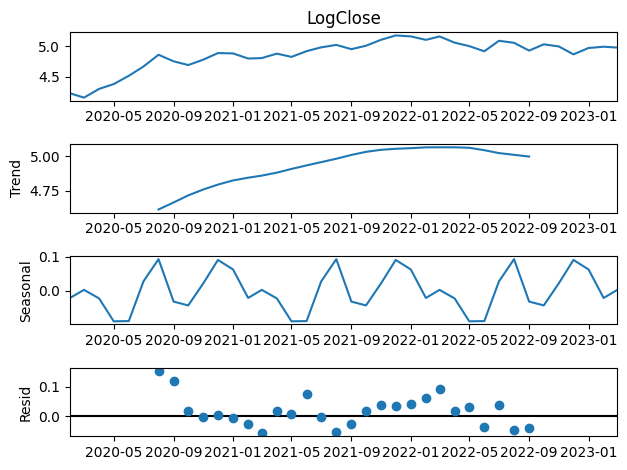

In [49]:
# Additive Decomposition (np.log(y) = Trend + Seasonal + Residuals)
result_add_log = seasonal_decompose(df["LogClose"], model="additive")
result_add_log.plot();

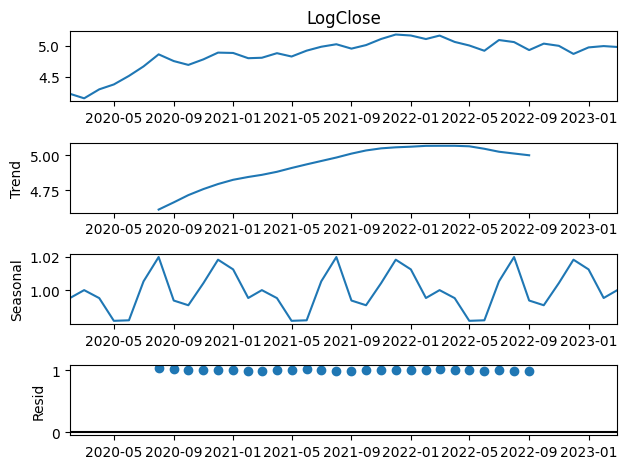

In [50]:
# Multiplicative Decomposition (np.log(y) = Trend * Seasonal * Residuals)
result_mult_log = seasonal_decompose(df["LogClose"], model="multiplicative")
result_mult_log.plot();

In [ ]:
# Comparing the ADF tests for both residuals


In [52]:
adfuller(result_add_log.resid.dropna())[1]

0.004492489649264436

In [53]:
adfuller(result_mult_log.resid.dropna())[1]

0.0034207378823832954

### (1.3) Remove seasonality

<AxesSubplot:xlabel='Date'>

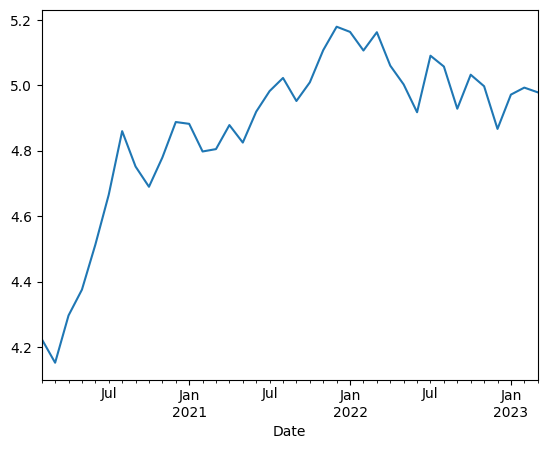

In [54]:
# Reminder: before removing seasonality, plot again the TS
df["LogClose"].plot()

In [57]:
# Removing the multiplicative seasonal component
df["DeseasonalizedLog"] = df["LogClose"]/result_mult_log.seasonal

/var/folders/sj/l5x1qb910_n10lhvkrhd4dc40000gn/T/ipykernel_96767/413294431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DeseasonalizedLog"] = df["LogClose"]/result_mult_log.seasonal


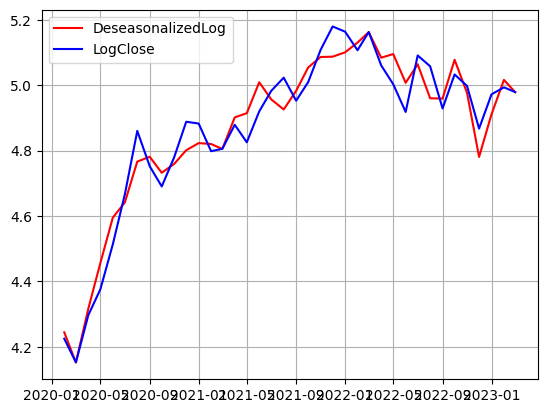

In [59]:
# Having a look at the deseasonalized LogClose
plt.plot(df["DeseasonalizedLog"], label="DeseasonalizedLog", c="red")
plt.plot(df["LogClose"], label="LogClose", c="blue")
plt.grid()
plt.legend()
plt.show()

👆 Our intuition is confirmed, there is no seasonality in the historic values of the `AAPL` stock price. But we can still work with the deseasonalized version and re-introduce it during the forecasts.

## (2) STATIONARITY / DIFFERENCING

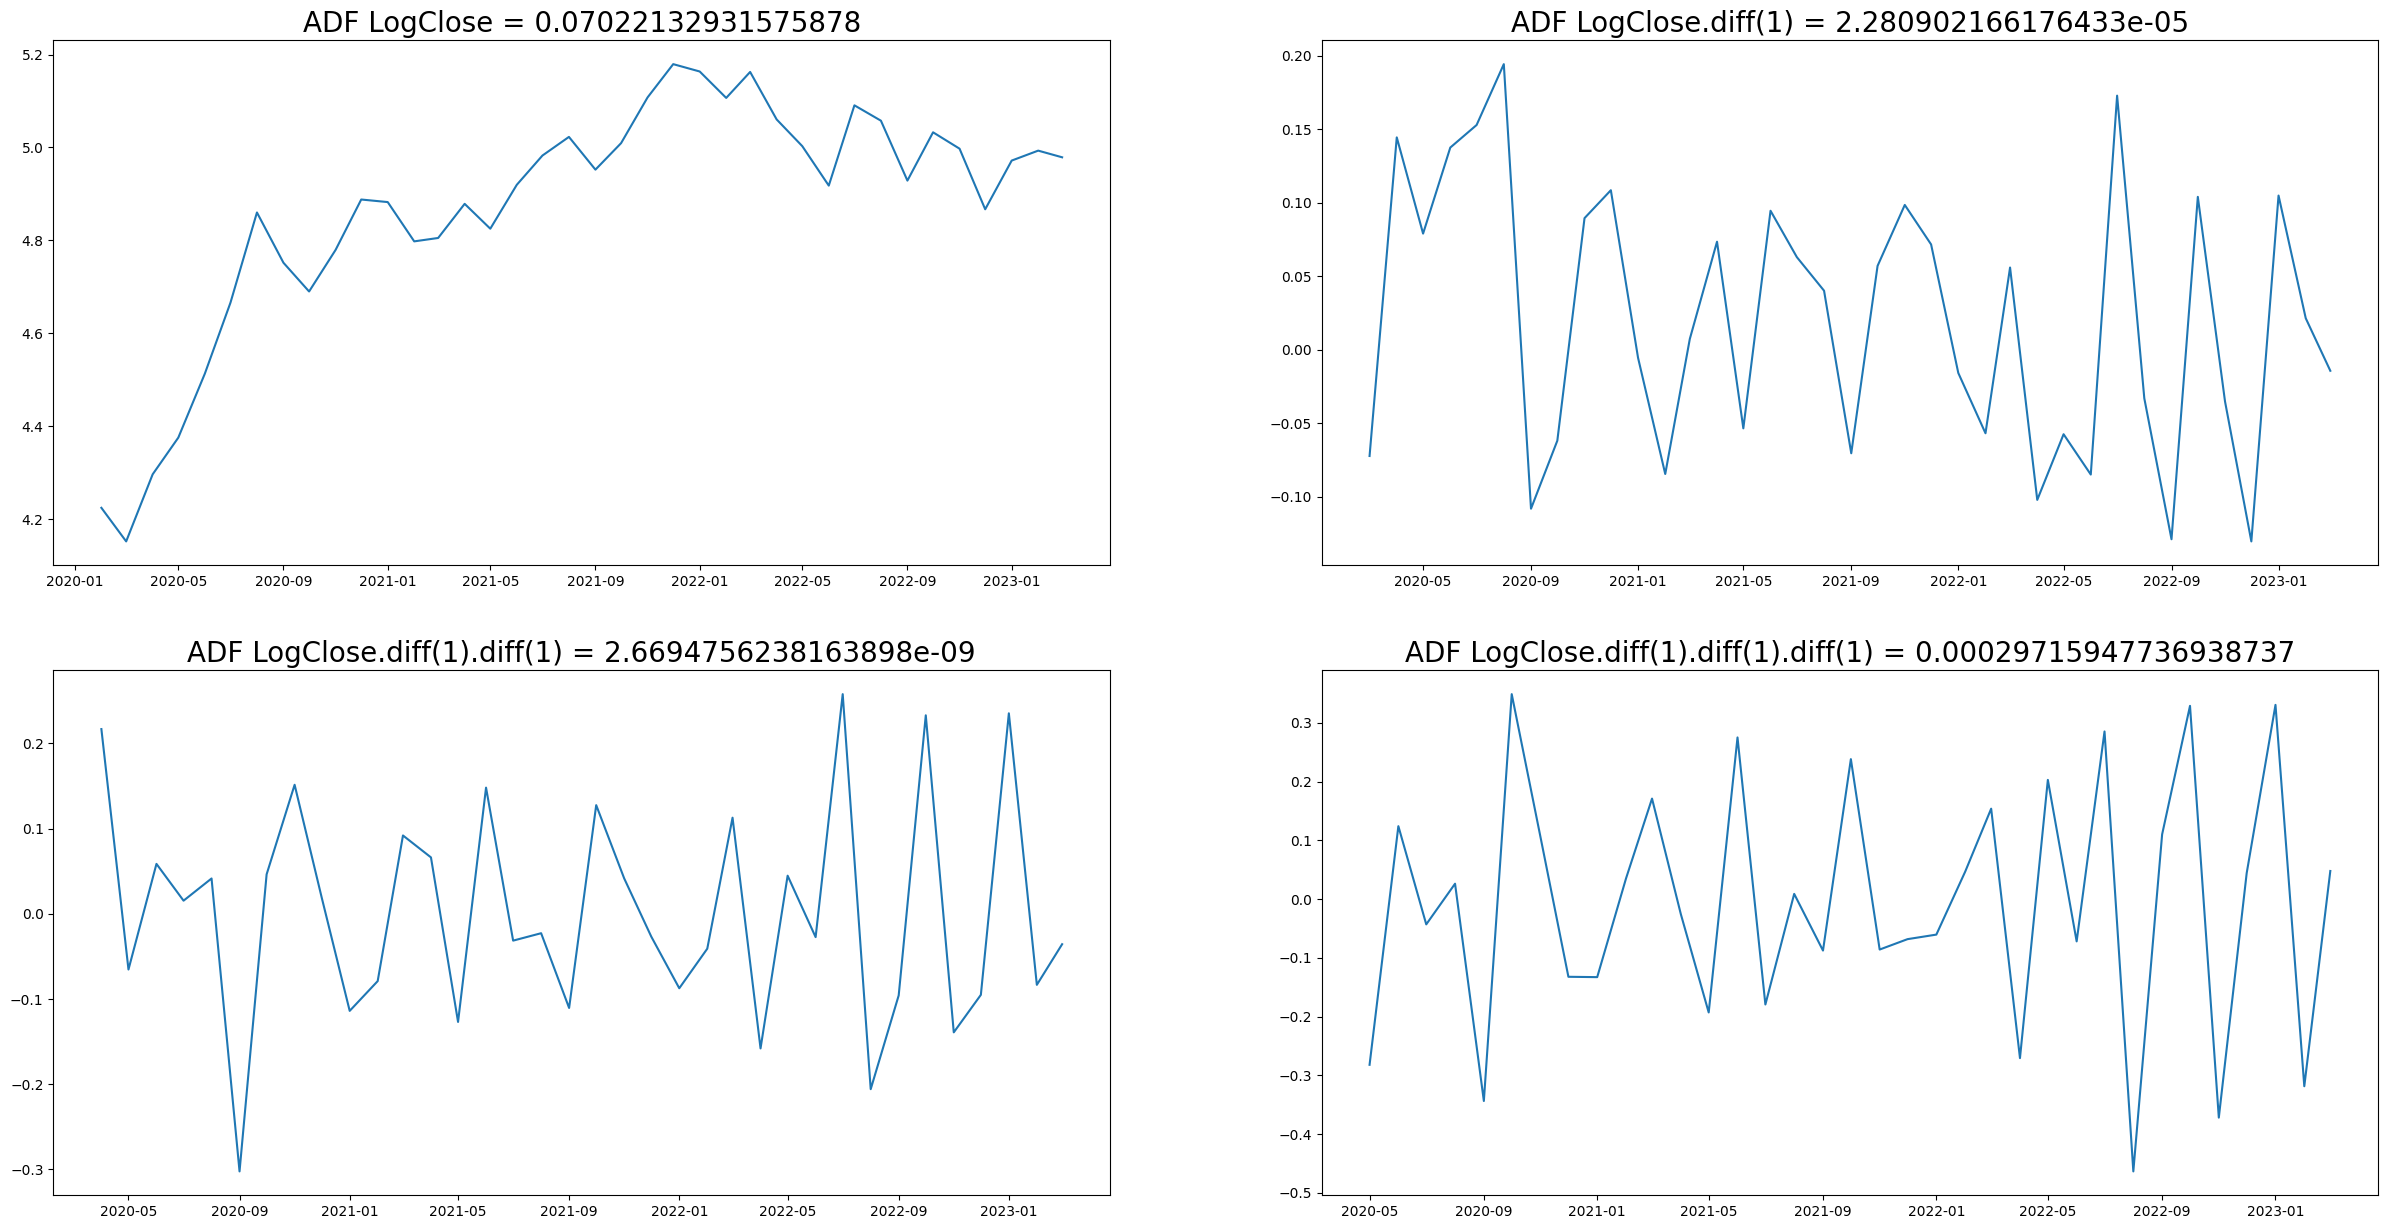

In [60]:
fig, ax = plt.subplots(2,2, figsize = (30,15))

ax[0][0].set_title(f"ADF LogClose = {adfuller(df.LogClose)[1]}", size = 20)
ax[0][0].plot(df["LogClose"])

ax[0][1].set_title(f"ADF LogClose.diff(1) = {adfuller(df.LogClose.diff(1).dropna())[1]}", size = 20)
ax[0][1].plot(df["LogClose"].diff(1).dropna())

ax[1][0].set_title(f"ADF LogClose.diff(1).diff(1) = {adfuller(df.LogClose.diff(1).diff(1).dropna())[1]}", size = 20)
ax[1][0].plot(df["LogClose"].diff(1).diff(1).dropna())

ax[1][1].set_title(f"ADF LogClose.diff(1).diff(1).diff(1) = {adfuller(df.LogClose.diff(1).diff(1).diff(1).dropna())[1]}", size = 20)
ax[1][1].plot(df["LogClose"].diff(1).diff(1).diff(1).dropna())

plt.show();

👆 Diffencing $\color{green}{d=1}$ should be enough!

In [61]:
y_diff = df["LogClose"].diff(1).dropna()
y_diff_diff = df["LogClose"].diff(1).diff(1).dropna()
y_diff_diff_diff = df["LogClose"].diff(1).diff(1).diff(1).dropna()

## (3) <font color="blue">ACF</font> and <font color="red">PACF</font>

In [62]:
len(df)

38

In [63]:
# LAGS MUST BE LOWER THAN 50% OF THE LEN(DF)
lags = int(len(df)/3)

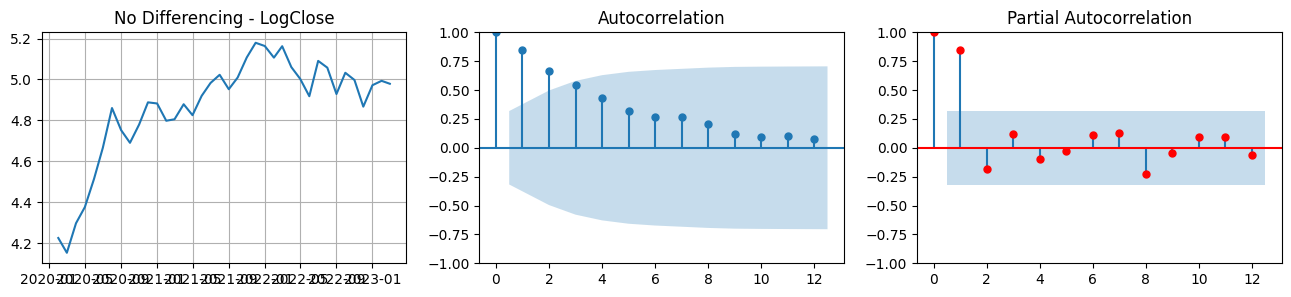

In [64]:
fig, ax = plt.subplots(1,3, figsize=(16,3))

ax[0].plot(df["LogClose"]);
ax[0].set_title("No Differencing - LogClose")
ax[0].grid()
plot_acf(df["LogClose"], lags=lags, ax=ax[1]);
plot_pacf(df["LogClose"], lags=lags, ax=ax[2], method='ywm' , color='r');

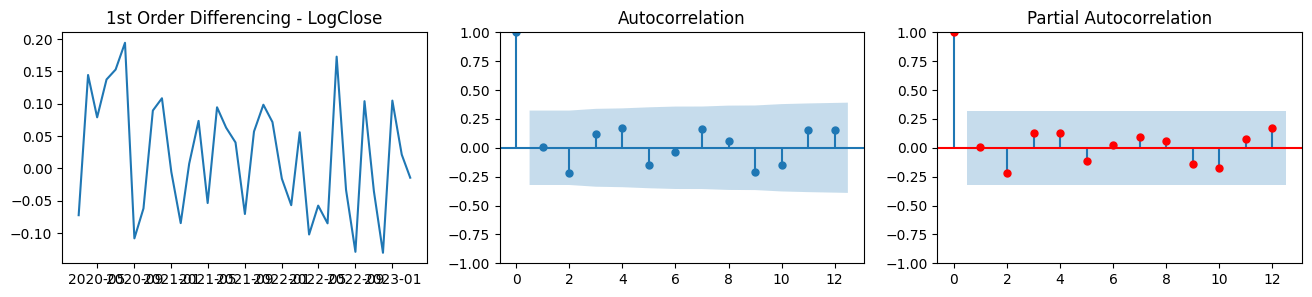

In [65]:
fig, ax = plt.subplots(1,3, figsize=(16,3))

ax[0].plot(y_diff);
ax[0].set_title("1st Order Differencing - LogClose")
plot_acf(y_diff, lags=lags, ax=ax[1]);
plot_pacf(y_diff, lags=lags, ax=ax[2], method='ywm' , color='r');

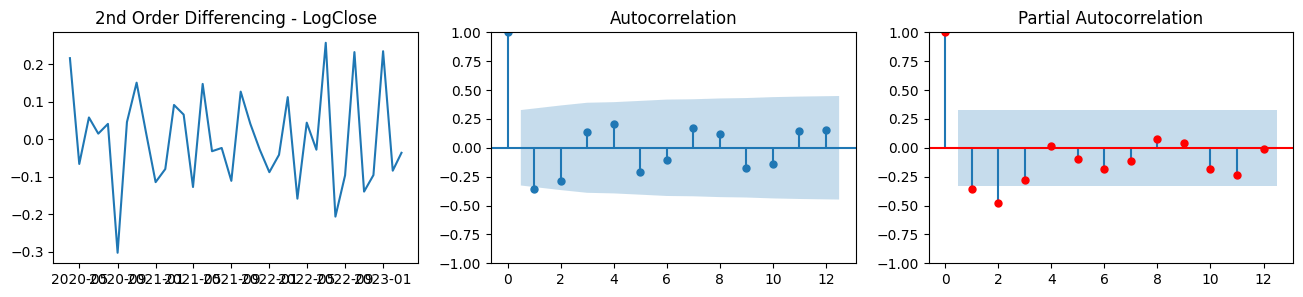

In [66]:
fig, ax = plt.subplots(1,3, figsize=(16,3))

ax[0].plot(y_diff_diff);
ax[0].set_title("2nd Order Differencing - LogClose")
plot_acf(y_diff_diff, lags=lags, ax=ax[1]);
plot_pacf(y_diff_diff, lags=lags, ax=ax[2], method='ywm' , color='r');

## (4) <font color="red">AR</font><font color="green">I</font><font color="blue">MA</font> MODEL

### (4.1) Choosing parameters visually

In [ ]:
p = 2 # PACF - RED
d = 1
q = 1 # ACF - BLUE

### (4.2) Temporal <font color="blue">Train</font>-<font color="orange">Test</font> split

In [87]:
len(df)

38

In [88]:
train_ratio = 0.70
train_index_last = int(train_ratio*len(df))
df_train = df.iloc[:train_index_last,:]
df_test = df.iloc[train_index_last:,:]

### (4.3) <font color="blue">Training</font>

In [89]:
arima = ARIMA(df_train["DeseasonalizedLog"], order = (p,d,q))
arima = arima.fit()

/Users/davywai/.pyenv/versions/3.10.6/envs/lewagondata/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/davywai/.pyenv/versions/3.10.6/envs/lewagondata/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/davywai/.pyenv/versions/3.10.6/envs/lewagondata/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## (5) <font color="orange">FORECAST</font>

❗️ Keep in mind that we will have to revert to the "original" Time Series with two steps:
- "re-seasonalize"
- "exponentiate"

### (5.1) Forecasting future values for the  "logarithmized" and "deseasonalized" TS

In [90]:
df_test

,Close,LogClose,DeseasonalizedLog
Date,,,
2022-04-01,157.649994,5.060377,5.083905
2022-05-01,148.839996,5.002872,5.095073
2022-06-01,136.720001,4.917935,5.006989
2022-07-01,162.509995,5.090740,5.063832
2022-08-01,157.220001,5.057646,4.959797
2022-09-01,138.199997,4.928702,4.958774
2022-10-01,153.339996,5.032658,5.077625
2022-11-01,148.029999,4.997415,4.976113
2022-12-01,129.929993,4.866996,4.780224


In [91]:
len(df_test)

12

In [ ]:
# Forecasting only the values without the confidence intervals
forecasts = arima.forecast(len(df_test), alpha = 0.5)

In [93]:
# 95% confidence
forecasts_results = arima.get_forecast(len(df_test), alpha = 0.5)

# Forecasts
forecasts = forecasts_results.predicted_mean # returns the same results as the previous cell

# Confidence intervals
confidence_inter = forecasts_results.conf_int().values
lower_predicted_bounds = confidence_inter[:,0]
upper_predicted_bounds = confidence_inter[:,1]


### (5.2) Recomposing the original Time Series and the predictions

**Wrap-up**

1. We started from `df["Close"]`
2. Applied the `logarithm` function
3. `Deseasonalized` `df["LogClose"]`

**Reconstruction steps**

Let's reverse-engineer the Time Series

1. Reseasonalize `df["LogClose"]` multiplying by `result_mult_log.seasonal`
2. Apply the `exponential function`

In [94]:
## TRAIN
train_reconstructed = np.exp(df_train["LogClose"]*result_mult_log.seasonal[:train_index_last])
train_reconstructed

Date
2020-02-01     67.037257
2020-03-01     63.600592
2020-04-01     72.003928
2020-05-01     73.434028
2020-06-01     84.165554
2020-07-01    108.927424
2020-08-01    142.025258
2020-09-01    112.520198
2020-10-01    104.431116
2020-11-01    121.510938
2020-12-01    145.001548
2021-01-01    140.199307
2021-02-01    118.638113
2021-03-01    122.212475
2021-04-01    128.525150
2021-05-01    114.190894
2021-06-01    125.485153
2021-07-01    149.773371
2021-08-01    167.645668
2021-09-01    137.313488
2021-10-01    143.299801
2021-11-01    168.954217
2021-12-01    195.074674
2022-01-01    186.341360
2022-02-01    161.322690
2022-03-01    174.705946
dtype: float64

In [95]:
## TEST
test_reconstructed = np.exp(df_test["LogClose"]*result_mult_log.seasonal[train_index_last:])
test_reconstructed

Date
2022-04-01    154.000909
2022-05-01    135.957072
2022-06-01    125.269163
2022-07-01    166.965950
2022-08-01    173.716641
2022-09-01    134.130315
2022-10-01    146.655847
2022-11-01    151.230977
2022-12-01    141.931288
2023-01-01    153.469111
2023-02-01    144.094442
2023-03-01    145.387002
dtype: float64

In [96]:
## FORECASTS
forecasts_reconstructed = np.exp(forecasts*result_mult_log.seasonal[train_index_last:])
forecasts_reconstructed

2022-04-01    174.820391
2022-05-01    162.786177
2022-06-01    164.883082
2022-07-01    184.603833
2022-08-01    200.710393
2022-09-01    174.167444
2022-10-01    173.020366
2022-11-01    183.825849
2022-12-01    199.089752
2023-01-01    191.774643
2023-02-01    176.897034
2023-03-01    179.935674
Freq: MS, dtype: float64

In [97]:
## LOWER BOUND
lower_bound_reconstructed = np.exp(lower_predicted_bounds*result_mult_log.seasonal[train_index_last:])
lower_bound_reconstructed

Date
2022-04-01    153.748738
2022-05-01    131.384087
2022-06-01    123.090128
2022-07-01    128.243498
2022-08-01    130.609317
2022-09-01    108.979693
2022-10-01    103.411189
2022-11-01    104.612667
2022-12-01    107.862644
2023-01-01    100.458257
2023-02-01     90.376252
2023-03-01     88.668691
Name: seasonal, dtype: float64

In [98]:
## UPPER BOUND
upper_bound_reconstructed = np.exp(upper_predicted_bounds*result_mult_log.seasonal[train_index_last:])
upper_bound_reconstructed

Date
2022-04-01    198.779968
2022-05-01    201.693676
2022-06-01    220.866054
2022-07-01    265.733356
2022-08-01    308.436359
2022-09-01    278.348174
2022-10-01    289.485570
2022-11-01    323.019606
2022-12-01    367.474114
2023-01-01    366.097467
2023-02-01    346.247605
2023-03-01    365.144072
Name: seasonal, dtype: float64

### (5.3) Plots

In [99]:
def plot_forecast(fc, train, test,lower=None,upper=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);


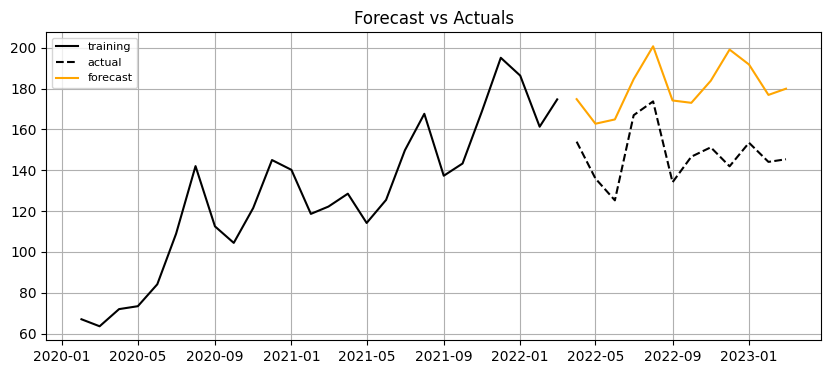

In [100]:
plot_forecast(forecasts_reconstructed,
              train_reconstructed,
              test_reconstructed,
              lower_bound_reconstructed,
              upper_bound_reconstructed)

plt.grid()

In [101]:
test_reconstructed

Date
2022-04-01    154.000909
2022-05-01    135.957072
2022-06-01    125.269163
2022-07-01    166.965950
2022-08-01    173.716641
2022-09-01    134.130315
2022-10-01    146.655847
2022-11-01    151.230977
2022-12-01    141.931288
2023-01-01    153.469111
2023-02-01    144.094442
2023-03-01    145.387002
dtype: float64

In [103]:
forecasts_reconstructed

2022-04-01    174.820391
2022-05-01    162.786177
2022-06-01    164.883082
2022-07-01    184.603833
2022-08-01    200.710393
2022-09-01    174.167444
2022-10-01    173.020366
2022-11-01    183.825849
2022-12-01    199.089752
2023-01-01    191.774643
2023-02-01    176.897034
2023-03-01    179.935674
Freq: MS, dtype: float64

In [104]:
test_reconstructed - forecasts_reconstructed

Date
2022-04-01   -20.819482
2022-05-01   -26.829105
2022-06-01   -39.613919
2022-07-01   -17.637883
2022-08-01   -26.993753
2022-09-01   -40.037129
2022-10-01   -26.364519
2022-11-01   -32.594872
2022-12-01   -57.158464
2023-01-01   -38.305532
2023-02-01   -32.802592
2023-03-01   -34.548672
dtype: float64